In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import pickle

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## 1. Loading and inspecting the data

In [4]:
input_data = pd.read_csv("aki_data/test_data.tsv", sep="\t", )
input_data_qm = pd.read_csv("aki_data/test_qm.csv")
translation = pd.read_csv("aki_data/translation.tsv", sep="\t", index_col=0)
pathways = pd.read_csv("aki_data/pathways.tsv", sep="\t")
design_matrix = pd.read_csv("aki_data/design_matrix.tsv", sep="\t")

In [5]:
input_data_preprocessed = input_data_qm.fillna(0)
input_data_preprocessed

,Protein,TM_P1911_190,TM_P1911_191,TM_P1911_192,TM_P1911_193,TM_P1911_194,TM_P1911_196,TM_P1911_197,TM_M2012_010,TM_M2012_011,...,TM_M2012_190,TM_M2012_191,TM_M2012_192,TM_M2012_196,TM_M2012_197,TM_M2012_198,TM_M2012_199,TM_M2012_200,TM_M2012_202,TM_M2012_203
0,P08603,22.381866,22.773908,22.732549,22.960530,22.906198,23.167862,23.122564,23.110142,23.179716,...,23.416677,23.498007,23.459972,23.403313,23.454894,23.602666,23.682634,23.665858,24.015710,23.655648
1,P02671,25.349974,25.431340,25.459891,25.275259,25.592789,24.829806,24.208987,23.984077,26.075865,...,24.984516,25.023149,24.971465,23.369445,24.604836,24.623221,24.787905,25.095571,25.103341,24.914344
2,P01042,22.061788,21.872170,21.966596,22.256140,22.505168,22.993978,23.277504,22.963205,22.767097,...,22.953879,23.089170,23.018547,23.280626,23.503529,23.471356,23.471414,23.193750,24.101306,23.486766
3,P00450,22.647246,23.193086,23.332780,23.206429,22.959381,23.008403,22.770807,22.971128,23.373016,...,23.788756,23.932623,23.904721,23.273831,23.462794,23.783564,23.968122,23.956618,23.989086,23.834912
4,P05156,21.301448,21.435684,21.304184,21.459141,21.532018,22.006447,21.968122,21.688934,21.372610,...,21.850530,21.883567,21.936084,21.778412,22.051000,22.187546,21.965964,21.820840,22.373783,22.076671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,P07333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.439899,0.000000,...,0.000000,0.000000,0.000000,19.498665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
550,Q06323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,18.418491,19.347011,0.000000,0.000000,19.331198,0.000000,17.185418
551,P16035,0.000000,18.396452,19.119550,20.334371,20.238982,19.338304,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
552,O95633,0.000000,0.000000,16.345104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,18.976126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [45]:
input_data

,PeptideSequence,Charge,Decoy,Protein,CK_P1912_146,CK_P1912_147,CK_P1912_148,CK_P1912_150,CK_P1912_151,CK_P1912_152,...,TM_M2012_191,TM_M2012_192,TM_M2012_196,TM_M2012_197,TM_M2012_198,TM_M2012_199,TM_M2012_200,TM_M2012_202,TM_M2012_203,RetentionTime
0,VDRDVAPGTLC(UniMod:4)DVAGWGIVNHAGR,3,False,P00746,7238870.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3749.820
1,VDRDVAPGTLC(UniMod:4)DVAGWGIVNHAGR,4,False,P00746,2681940.0,2634110.0,2297470.0,1935300.0,2181160.0,2615960.0,...,NaN,519698.0,NaN,NaN,NaN,NaN,NaN,2221730.0,NaN,3593.610
2,VDTVDPPYPR,2,False,P04004,28535800.0,34874600.0,34586900.0,25820800.0,24657400.0,30830100.0,...,12486000.0,11995900.0,24003800.0,9802000.0,6933130.0,7297560.0,4328240.0,13002400.0,4716600.0,2502.150
3,AVTEQGAELSNEER,2,False,P27348,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,340523.0,336960.0,435119.0,257422.0,NaN,NaN,1790.840
4,VDVIPVNLPGEHGQR,2,False,P02751,652100.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3158.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7331,GSPMEISLPIALSK,3,False,P09960,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4348.000
7332,NAYAVLYDIILK,3,False,Q06323,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5361.965
7333,PVWLGFLGPIIK,3,False,P00450,NaN,NaN,NaN,NaN,NaN,NaN,...,3247630.0,NaN,1245630.0,NaN,1041380.0,1032760.0,881958.0,1441870.0,564108.0,5510.955
7334,RVLVTGAGK,2,False,Q7Z4W1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,221930.0,319971.0,447743.0,1107330.0,546236.0,101497.0,293407.0,1011.060


In [10]:
translation.head()

,input,translation
1323,A0A075B6P5,R-HSA-166663
1324,A0A075B6P5,R-HSA-173623
1325,A0A075B6P5,R-HSA-198933
1326,A0A075B6P5,R-HSA-202733
1327,A0A075B6P5,R-HSA-2029481


In [15]:
design_matrix.head()

,sample,group
0,TM_P1911_190,2
1,TM_P1911_191,2
2,TM_P1911_192,2
3,TM_P1911_193,2
4,TM_P1911_194,2


In [52]:
pathways

,parent,child
0,R-HSA-109581,R-HSA-109606
1,R-HSA-109581,R-HSA-169911
2,R-HSA-109581,R-HSA-5357769
3,R-HSA-109581,R-HSA-75153
4,R-HSA-109582,R-HSA-140877
...,...,...
2598,R-HSA-983705,R-HSA-983695
2599,R-HSA-983712,R-HSA-2672351
2600,R-HSA-983712,R-HSA-936837
2601,R-HSA-991365,R-HSA-170670


## 2. Creating the Graphs

### 2.0 Create Hierarchical Pathway Graph

In [6]:
G = nx.DiGraph()
for _, row in pathways.iterrows():
    G.add_edge(row['parent'], row['child'])

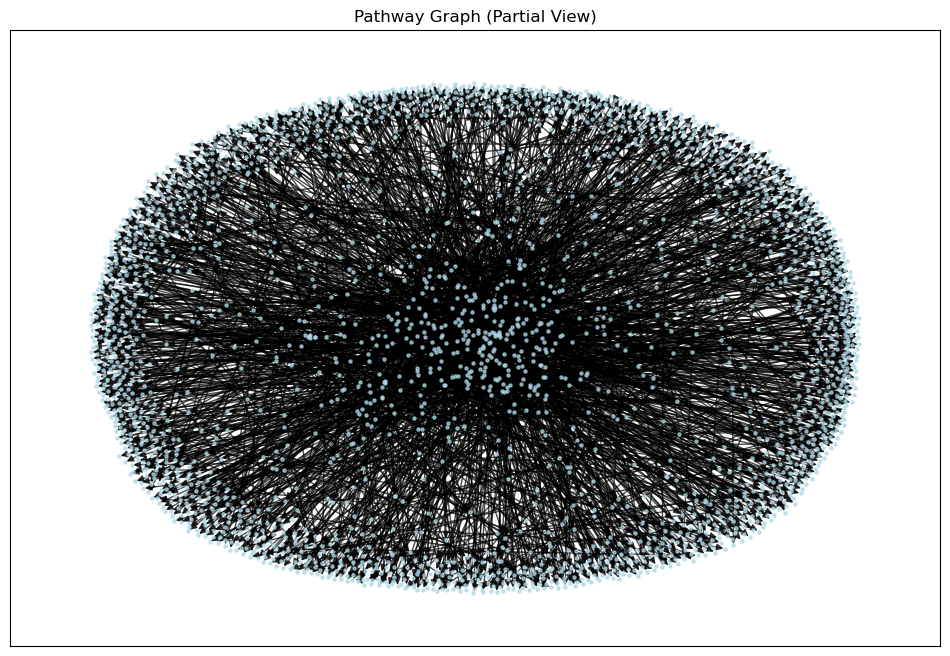

In [35]:
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, with_labels=False, node_size=5, node_color='lightblue', alpha=0.7)
plt.title("Pathway Graph (Partial View)")
plt.show()

### 2.1 Graph type 1: Summing up all abundancies of all proteins in a pathway --> 1 feature per pathway

#### 2.1.1 Map Proteins to Pathways

In [48]:
descendants = {}
for node in G.nodes():
    descendants[node] = nx.descendants(G, node)

for _, row in translation.iterrows():
    protein = row['input']  
    pathway = row['translation']
    if pathway in G:
        # Ensure the 'proteins' attribute exists for the pathway
        G.nodes[pathway].setdefault('proteins', []).append(protein)

        # Iterate through descendants and assign proteins
        for descendant in nx.descendants(G, pathway):
            G.nodes[descendant].setdefault('proteins', []).append(protein)

In [49]:
# check that proteins assigned to child nodes
for node in G.nodes():
    if 'proteins' in G.nodes[node]:
        for child in G.successors(node):
            if 'proteins' not in G.nodes[child]:
                print("Error: Proteins not assigned to child node") 

#### 2.1.2 Integrate Patient Data and save to file

In [51]:
patient_ids = input_data_preprocessed.columns[1:]
for patient_id in patient_ids:
    patient_graph = G.copy()
    for _, row in input_data_preprocessed.iterrows():
        protein = row['Protein']  # Assuming 'Protein' column contains protein IDs
        abundance = row[patient_id]  # Protein abundance for this patient
        # For each pathway associated with this protein, update the graph
        for pathway in patient_graph.nodes:
            if 'proteins' in patient_graph.nodes[pathway] and protein in patient_graph.nodes[pathway]['proteins']:
                if 'abundance' not in patient_graph.nodes[pathway]:
                    patient_graph.nodes[pathway]['abundance'] = 0
                patient_graph.nodes[pathway]['abundance'] += abundance
    # save each patitent graph to a pickle file in graph folder
    with open('graph_data/type1/type1_patient_graph_' + patient_id + '.pkl', 'wb') as f:
        pickle.dump(patient_graph, f)


#### 2.1.3 Visualize sample patient graph

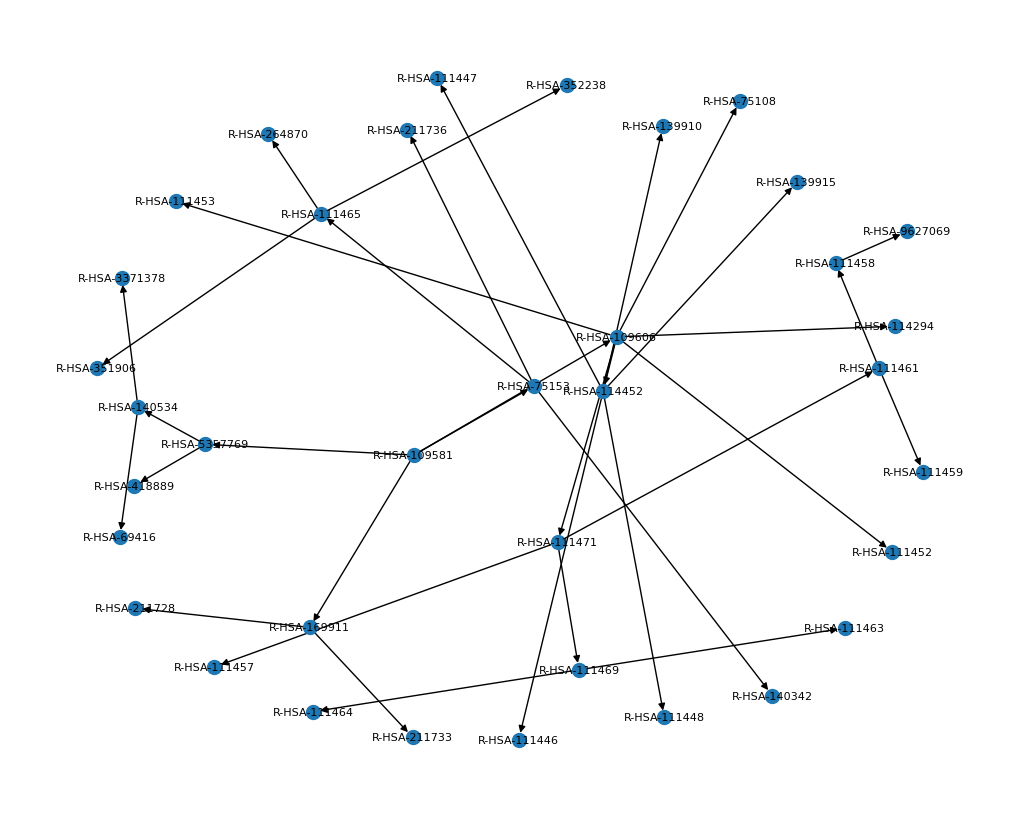

In [52]:
def extract_branch(graph, root_node, max_depth):
    nodes = set()
    for depth in range(max_depth + 1):
        descendants = nx.descendants_at_distance(graph, root_node, depth)
        nodes.update(descendants)
    nodes.add(root_node)
    return graph.subgraph(nodes)

# Example usage
root_node = 'R-HSA-109581' # Replace with the actual root node of the branch
max_depth = 5  # Adjust as needed
branch = extract_branch(patient_graph, root_node, max_depth)

# Plotting the branch
plt.figure(figsize=(10, 8))
nx.draw(branch, with_labels=True, node_size=100, font_size=8)
plt.show()

### 2.2 Graph type 2: Adding all abundancies of all proteins in a pathway --> 1 feature per protein

## 3. Analze design matrix

In [94]:
design_matrix.head()

,sample,group
0,TM_P1911_190,2
1,TM_P1911_191,2
2,TM_P1911_192,2
3,TM_P1911_193,2
4,TM_P1911_194,2


In [75]:
# get number of samples in group 1 and group 2
group1 = design_matrix[design_matrix['group'] == 1]
group2 = design_matrix[design_matrix['group'] == 2]
group1_num = len(group1)
group2_num = len(group2)

print("group1_num: ", group1_num)
print("group2_num: ", group2_num)


group1_num:  74
group2_num:  123


In [93]:
# get num of smaples that have 'M2012' in thgeir id
group_M2012 = design_matrix[design_matrix['sample'].str.contains('M2012')]

print("group_M2012: ", len(group_M2012))
print("remaining samples: ", len(design_matrix) - len(group_M2012))

group_M2012:  141
remaining samples:  56
